## Comparisons of the original Prokudin-Gorskii images

Пример функции align, которая сопоставляет изображения с фотографий Прокудина-Горского и возвращает координаты точек на синем и красном каналах.

Импорт библиотек

In [1]:
import numpy as np
from numpy import dstack
from skimage.io import imread, imshow
from skimage import img_as_float, img_as_ubyte

На вход функция принимает фотографию и координаты точки на зеленом канале. На выходе - координаты точек на синем и красном каналах.

In [2]:
def align(image, colrow):
    row_g, col_g = colrow[:]
    img = img_as_float(image)
       
    def cut(img):
        rows, columns = img.shape
        excess_rows, excess_columns = int(rows * 0.1), int(columns * 0.1)
        return img[excess_rows:rows - excess_rows, excess_columns:columns - excess_columns]
    
    def get_shift(green_ch, shifting_ch):
        best_r_shift, best_c_shift = -15, -15
        best_correlation = 0
        for c_shift in range(-15, 16):
            for r_shift in range(-15, 16):
                rolled = np.roll(shifting_ch, r_shift, 0)
                rolled = np.roll(rolled, c_shift, 1)
                corr = (rolled * green_ch).sum()
                if best_correlation < corr:
                    best_r_shift = r_shift
                    best_c_shift = c_shift
                    best_correlation = corr
        return best_r_shift, best_c_shift

    def prepare(img, new_r, new_c):
        rows, columns = img.shape
        excess_rows, excess_columns = int(rows * 0.1), int(columns * 0.1)
        return img[excess_rows - new_r:rows - excess_rows - new_r, excess_columns- new_c:columns - excess_columns - new_c]

    rows = img.shape[0]
    third = rows // 3

    b_rows = 0, third
    g_rows = third, 2 * third
    r_rows = 2 * third, 3 * third

    b = cut(img[b_rows[0]:b_rows[1]])
    g = cut(img[g_rows[0]:g_rows[1]])
    r = cut(img[r_rows[0]:r_rows[1]])

    new_br, new_bc = get_shift(g, b)
    new_rr, new_rc = get_shift(g, r)
    
    blue = row_g - third - new_br, col_g - new_bc
    red = row_g + third - new_rr, col_g - new_rc

    b = prepare(img[b_rows[0]:b_rows[1]], new_br, new_bc)
    r = prepare(img[r_rows[0]:r_rows[1]], new_rr, new_rc)

    img = dstack((r, g, b))

    return blue, red, img

Считывание изображения и вызов функции.

In [3]:
img = imread("00.png")
img = align(img_as_float(img), (508, 237))

Координаты точек на синем и красном каналах:

In [4]:
print(img[0], img[1])

(153, 236) (857, 238)


Полученное изображение.

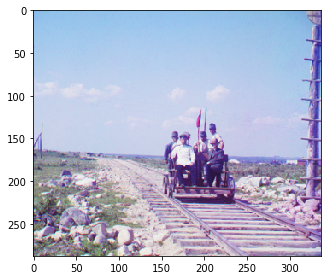

In [5]:
imshow(img[2])